# 卷积神经网络（CNN）

## 1. 利用`torchvision`导入MNIST数据

In [10]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision    # 数据库模块
import matplotlib.pyplot as plt
torch.manual_seed(1)

In [11]:
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = False

In [12]:
train_data = torchvision.datasets.MNIST(
    root='./mnist/',   # 保存或提取的path
    train=True,        # 表示是训练集
    transform=torchvision.transforms.ToTensor(),  # 转换PIL.Image或numpy.ndarray为
                                                  # FloatTensor (C*H*W),训练的时候
                                                  # normalize成[0,1]区间
    download=DOWNLOAD_MNIST,
)

In [13]:
test_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=False
)

In [14]:
train_loader = Data.DataLoader(
    dataset=train_data, 
    batch_size=BATCH_SIZE,
    shuffle=True
)

In [15]:
# volatile=True相当于 requires_grad=False
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1), volatile=True).type(torch.FloatTensor)[:2000]/255
test_y = test_data.test_labels[:2000]

E:\Anaconda3\envs\Pytorch\lib\site-packages\ipykernel_launcher.py:2: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


## 2. CNN模型

In [23]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(# input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,     # 输入的通道度，比如RGB就是3，灰度图就是1
                out_channels=16,   # 输出的feature map个数，也就是卷积核个数
                kernel_size=5,     # 卷积核大小，这里5x5
                stride=1,          # 卷积核步长
                padding=2,         # 图片外填充的宽度，这里2=(5-1)/2，故输出的feature map和原图size一样    
            ),
            nn.ReLU(),
            nn.MaxPool2d(2)        # 2x2的最大池化层 output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),  # shape (32, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(2)              # shape (32, 7, 7)
        )
        self.out = nn.Linear(32*7*7, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x

In [24]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


## 3. 训练

In [25]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [20]:
from sklearn.manifold import TSNE
from matplotlib import cm

In [21]:
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], labels
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9))
        plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max())
    plt.title('Visualize last layer')
    plt.show()
    plt.pause(0.01)

Epoch 0 | train loss: 2.3047 | test accuracy: 0.13


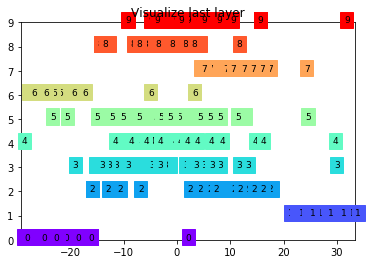

Epoch 0 | train loss: 0.4919 | test accuracy: 0.84


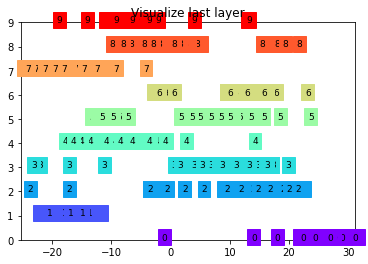

Epoch 0 | train loss: 0.2467 | test accuracy: 0.89


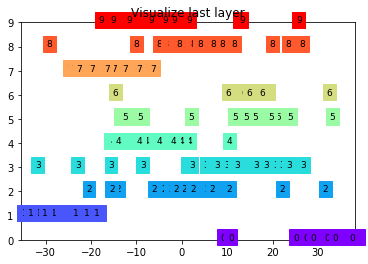

Epoch 0 | train loss: 0.1626 | test accuracy: 0.91


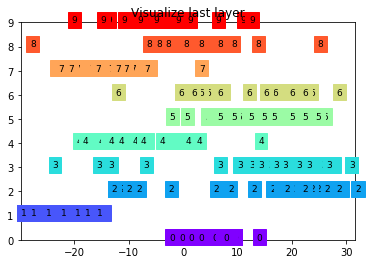

Epoch 0 | train loss: 0.3195 | test accuracy: 0.93


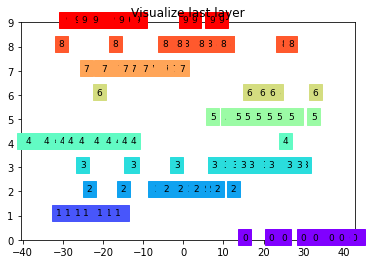

Epoch 0 | train loss: 0.1297 | test accuracy: 0.94


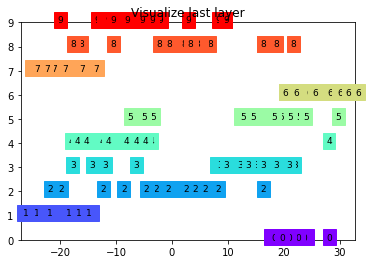

Epoch 0 | train loss: 0.1248 | test accuracy: 0.94


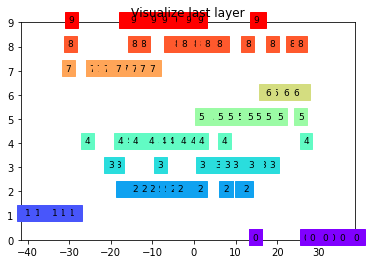

Epoch 0 | train loss: 0.1549 | test accuracy: 0.96


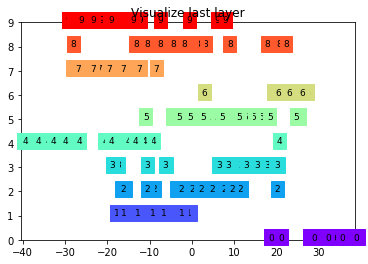

Epoch 0 | train loss: 0.2154 | test accuracy: 0.96


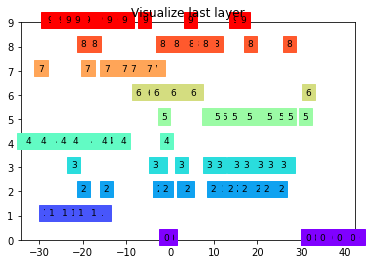

Epoch 0 | train loss: 0.0500 | test accuracy: 0.96


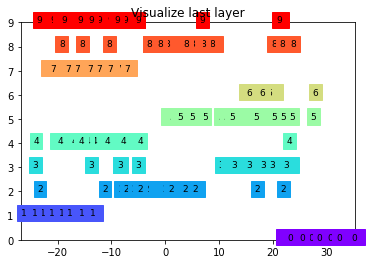

Epoch 0 | train loss: 0.0585 | test accuracy: 0.96


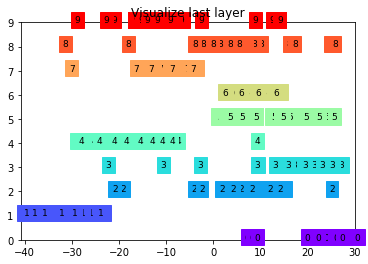

Epoch 0 | train loss: 0.0294 | test accuracy: 0.97


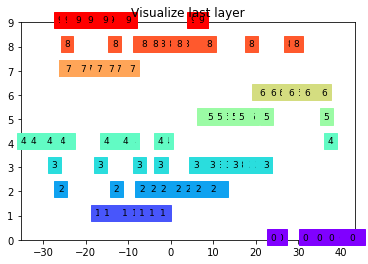

Epoch 0 | train loss: 0.1191 | test accuracy: 0.97


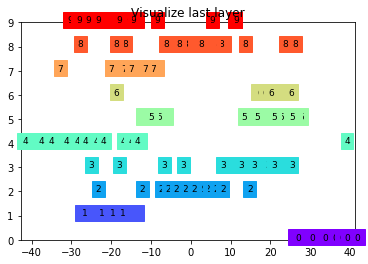

Epoch 0 | train loss: 0.0834 | test accuracy: 0.96


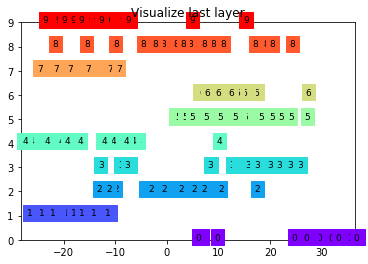

Epoch 0 | train loss: 0.0843 | test accuracy: 0.97


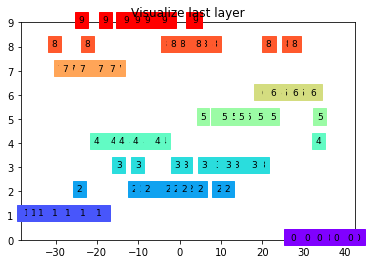

Epoch 0 | train loss: 0.0125 | test accuracy: 0.97


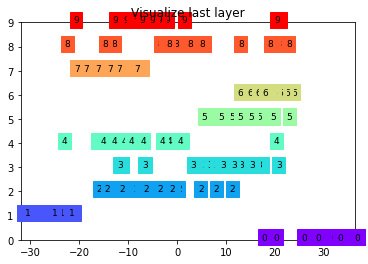

Epoch 0 | train loss: 0.0234 | test accuracy: 0.97


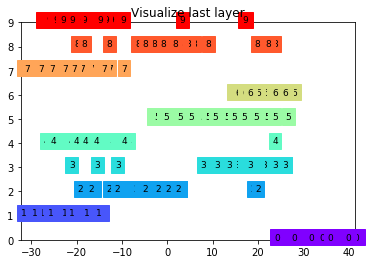

Epoch 0 | train loss: 0.0620 | test accuracy: 0.97


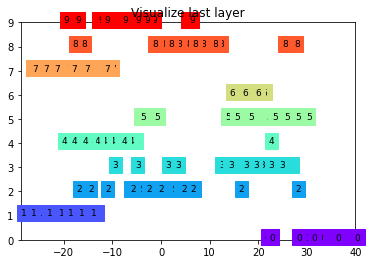

Epoch 0 | train loss: 0.0222 | test accuracy: 0.97


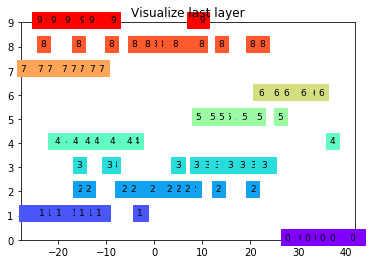

Epoch 0 | train loss: 0.0730 | test accuracy: 0.98


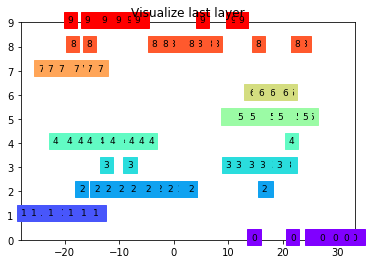

Epoch 0 | train loss: 0.3410 | test accuracy: 0.97


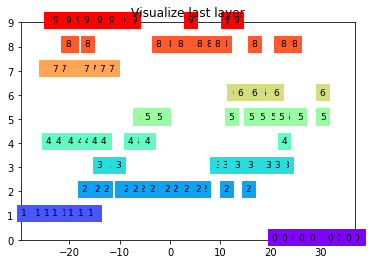

Epoch 0 | train loss: 0.2005 | test accuracy: 0.98


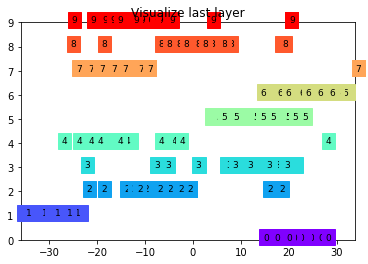

Epoch 0 | train loss: 0.0529 | test accuracy: 0.98


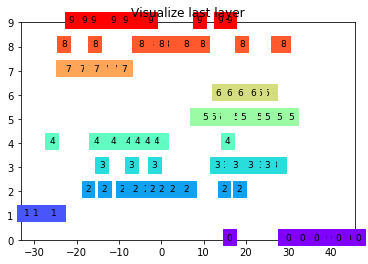

Epoch 0 | train loss: 0.1611 | test accuracy: 0.98


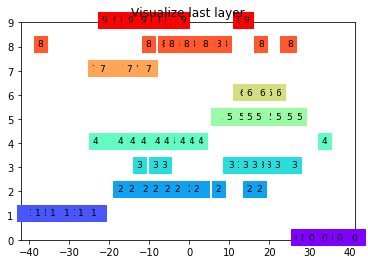

In [28]:
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
        
        output = cnn(b_x)[0]
        loss = loss_func(output, b_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
            print('Epoch', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
            tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
            plot_only = 500
            low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
            labels = test_y.numpy()[:plot_only]
            plot_with_labels(low_dim_embs, labels)
            
plt.ioff()